In [245]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib notebook


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import trackpy as tp
import pims as pm
from pathlib import Path as Path
import glob as gb
from scipy.interpolate import griddata

In [3]:
imFolderPath = Path("./Hammer-Aitoff-Projection/")

In [4]:
im = pm.ImageSequence('./Hammer-Aitoff-Projection/macro_image_*.tiff')

<IPython.core.display.Javascript object>


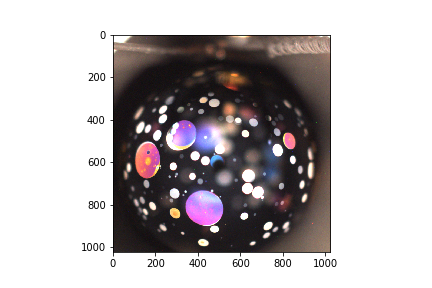

In [260]:
fig,ax = plt.subplots()
plt.imshow(im[0])

## Finding The Centre of the Bubble

For now, we will make the simplifying assumption that the center of the image is also the center of the bubble

## Mapping To Spherical Coordinates

We first need to map back to the pure spherical coordinates, so we can use the correct projection. In order to avoid unpleasant changes of spherical coordinate basis, we will go directly to a coordinate system that we want to project from: where the bubble is viewed as a conventional globe, with the poles at the top and bottom of the picture. The cartesian coordinate system is that z is vertical, and x is chosen to be horizontal

In [316]:
sz,sy,junk=im[0].shape
cy,cz = 493,609
end_y = 980
rho = end_y - cy
print(rho)

487


In [274]:
def y_Coord(indx):
    return indx-cy
def z_Coord(indx): #reverse the direction
    return -indx+cz

def theta(rho,z): #theta is tilt angle from z
    return np.arccos(z/rho)

def phi(rho,theta,x): #phi is the polar rotation angle in the xy plane
    return np.arcsin(x/(rho*np.sin(theta)))

def lat(theta):
    return np.pi/2-theta

#longitude is just phi


We can test out the function below, to find out its behaviour


In [275]:
raw_x = 300
raw_z = 400
x1 = x_Coord(raw_x)
z1 = z_Coord(raw_z)
th = theta(rho,z1)
ph = phi(rho,th,x1)
print(ph)
print(np.arcsin(x1/(rho*np.sin(th))))
x_num = 2*np.sqrt(2)*np.cos(lat(th))*np.sin(phi(rho,th,x1)/2.)
x_denom = np.sqrt(1+np.cos(lat(th)*np.cos(phi(rho,th,x1)/2.)))

y_num = np.sqrt(2)*np.sin(lat(th))
y_denom = np.sqrt(1+np.cos(lat(th))*np.cos(phi(rho,th,x1)/2))
#hammer_proj(rho,300,400)

-0.4459836232960281
-0.4459836232960281


## Displaying Projection
Displaying this projection is going to be a little odd. This is because the projection changes with distance. So, each 'pixel' you transform changes size and becomes distorted because we are moving from a 2D surface to a 3D surface. I don't know a good way of accomdating this, but it means we cannot just niavelly make a new NxN matrix that we can display as an image-- the pixels won't fit well anymore. The better way to do this is to treat it like actual experimental data and display it like an contour plot.
1. Create list of data
2. Interpolate the date
3. Plot the interopolation

In [320]:
imTest = im[0]
zSize,ySize = im[0].shape[slice(0,2)]
idz,idy = np.indices(list(im[0].shape[slice(0,2)]))
zCor = z_Coord(idz)
yCor = y_Coord(idy)
thArray = theta(rho,zCor)
phArray = phi(rho,thArray,yCor)

z_num = 2*np.sqrt(2)*np.cos(lat(thArray))*np.sin(phArray/2.)
z_denom = np.sqrt(1+np.cos(lat(thArray)*np.cos(phArray/2.)))

y_num = np.sqrt(2)*np.sin(lat(thArray))
y_denom = np.sqrt(1+np.cos(lat(thArray))*np.cos(phArray/2))
zArray = z_num/z_denom
yArray = y_num/y_denom

/home/rings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys
/home/rings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/rings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/rings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arcsin
  # Remove the CWD from sys.path while we load stuff.


In [277]:
z_g,y_g=np.mgrid[-2:2:zSize*1j,-2:2:ySize*1j]
values_red

array([34, 36, 38, ..., 40, 40, 49], dtype=uint8)

In [321]:
points = np.vstack([yArray.flatten(),zArray.flatten()]).transpose() #this is a little fucked up. This is because the griddate expects
#data in x,y format. However, because matplotlib is stupid, it displays images in row, col pairs, which corresponds to y,x
#as we usually think about this (vert, horz). To try not to be ambiguous, I've notated z as vert, and y as horz. 
values_red = np.array(im[0][:,:,0]).flatten()
values_green = np.array(im[0][:,:,1]).flatten()
values_blue = np.array(im[0][:,:,2]).flatten()


pValue = (np.isnan(points[:,0]) & np.isnan(points[:,1]))

points = points[~pValue]
values_red = values_red[~pValue]
values_green = values_green[~pValue]
values_blue = values_blue[~pValue]

#np.random.rand(10,2)
zMax = points[:,1].max()
zMin = points[:,1].min()

yMax = points[:,0].max()
yMin = points[:,0].min()

len(yt)
z_g,y_g=np.mgrid[zMin:zMax:zSize*1j,yMin:yMax:ySize*1j]
grid_r = griddata(points,values_red, (z_g,y_g))
grid_g = griddata(points,values_green, (z_g,y_g))
grid_b = griddata(points,values_blue, (z_g,y_g))

print(grid_z)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [322]:
grid_rgb = np.zeros([1024,1024,3]).astype('uint8')
grid_rgb[:,:,0] = grid_r
grid_rgb[:,:,1] = grid_g
grid_rgb[:,:,2] = grid_b

#grid_z =np.array([grid_r,grid_g,grid_b]).astype('uint8')
#grid_z.shape
#grid_rgb=np.reshape(grid_z,[1024,1024,3])
#grid_rgb = grid_z.T

<IPython.core.display.Javascript object>


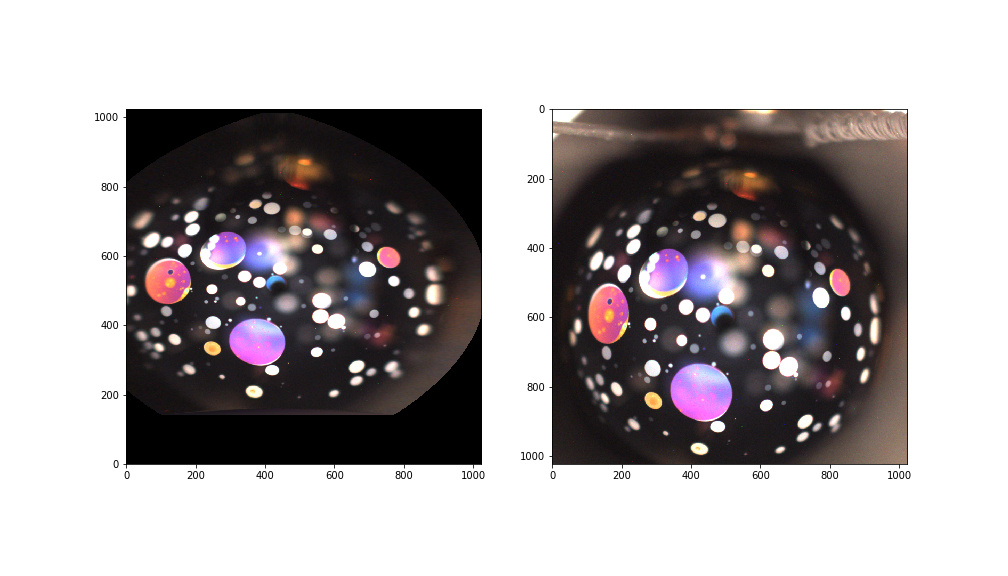

In [323]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
ax[0].imshow(grid_rgb, origin='lower')
ax[1].imshow(im[0])

## Drawing Grid Lines

Grid lines are simple: they are constant lat or long, with the other varying through 0 and 2pi

In [518]:
def latFunc(lat_angle):
    phi = np.linspace(-np.pi,np.pi,100)
    lat = lat_angle
    pphi, llat= np.meshgrid(phi,lat_angle)
    y_num = 2*np.sqrt(2)*np.cos(lat)*np.sin(phi/2.)
    y_denom = np.sqrt(1+np.cos(lat)*np.cos(phi/2.))

    z_num = np.sqrt(2)*np.sin(lat)
    z_denom = np.sqrt(1+np.cos(lat)*np.cos(phi/2))
    
    return np.c_[(y_num/y_denom).flatten(),(z_num/z_denom).flatten()]

def longFunc(phi):
    theta = np.linspace(-np.pi,np.pi,100)
    z_num = 2*np.sqrt(2)*np.cos(theta)*np.sin(phi/2.)
    z_denom = np.sqrt(1+np.cos(theta)*np.cos(phi/2.))

    y_num = np.sqrt(2)*np.sin(theta)
    y_denom = np.sqrt(1+np.cos(theta)*np.cos(phi/2))
    
    return np.c_[z_num/z_denom,y_num/y_denom]

In [431]:
phi = np.linspace(.000001,2*np.pi,100)
lat_angle = np.linspace(0-.01,0+.01, 1)
print(phi)
latFunc(np.pi)

[1.00000000e-06 6.34675082e-02 1.26934016e-01 1.90400524e-01
 2.53867033e-01 3.17333541e-01 3.80800049e-01 4.44266557e-01
 5.07733065e-01 5.71199573e-01 6.34666082e-01 6.98132590e-01
 7.61599098e-01 8.25065606e-01 8.88532114e-01 9.51998622e-01
 1.01546513e+00 1.07893164e+00 1.14239815e+00 1.20586465e+00
 1.26933116e+00 1.33279767e+00 1.39626418e+00 1.45973069e+00
 1.52319720e+00 1.58666370e+00 1.65013021e+00 1.71359672e+00
 1.77706323e+00 1.84052974e+00 1.90399624e+00 1.96746275e+00
 2.03092926e+00 2.09439577e+00 2.15786228e+00 2.22132879e+00
 2.28479529e+00 2.34826180e+00 2.41172831e+00 2.47519482e+00
 2.53866133e+00 2.60212783e+00 2.66559434e+00 2.72906085e+00
 2.79252736e+00 2.85599387e+00 2.91946038e+00 2.98292688e+00
 3.04639339e+00 3.10985990e+00 3.17332641e+00 3.23679292e+00
 3.30025942e+00 3.36372593e+00 3.42719244e+00 3.49065895e+00
 3.55412546e+00 3.61759196e+00 3.68105847e+00 3.74452498e+00
 3.80799149e+00 3.87145800e+00 3.93492451e+00 3.99839101e+00
 4.06185752e+00 4.125324

array([[ 2.8282857 ,  0.0141419 ],
       [ 3.05216862,  0.01547237],
       [ 3.25519297,  0.01720893],
       [ 3.435966  ,  0.01953487],
       [ 3.59324123,  0.02276756],
       [ 3.72591873,  0.02750734],
       [ 3.83302562,  0.03504129],
       [ 3.913608  ,  0.04871525],
       [ 3.9659441 ,  0.08078026],
       [ 3.96754674,  0.24023435],
       [-3.96754674,  0.24023435],
       [-3.9659441 ,  0.08078026],
       [-3.913608  ,  0.04871525],
       [-3.83302562,  0.03504129],
       [-3.72591873,  0.02750734],
       [-3.59324123,  0.02276756],
       [-3.435966  ,  0.01953487],
       [-3.25519297,  0.01720893],
       [-3.05216862,  0.01547237],
       [-2.8282857 ,  0.0141419 ]])

<IPython.core.display.Javascript object>


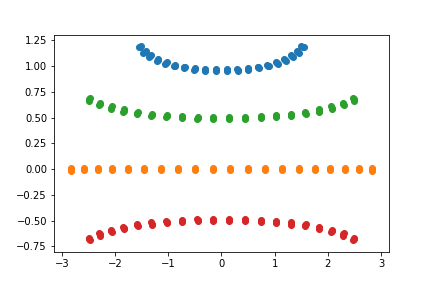

[[-1.55192928  1.18231928]
 [-1.46599565  1.13229476]
 [-1.35231276  1.08926302]
 [-1.21537939  1.05281443]
 [-1.05915267  1.02250884]
 [-0.88716924  0.99792995]
 [-0.70265015  0.97871404]
 [-0.50858683  0.96456404]
 [-0.30780986  0.9552555 ]
 [-0.10304432  0.95063866]
 [ 0.10304432  0.95063866]
 [ 0.30780986  0.9552555 ]
 [ 0.50858683  0.96456404]
 [ 0.70265015  0.97871404]
 [ 0.88716924  0.99792995]
 [ 1.05915267  1.02250884]
 [ 1.21537939  1.05281443]
 [ 1.35231276  1.08926302]
 [ 1.46599565  1.13229476]
 [ 1.55192928  1.18231928]
 [-1.5282057   1.19001968]
 [-1.44450049  1.14039156]
 [-1.3331824   1.09762673]
 [-1.19869916  1.0613525 ]
 [-1.04497711  1.03115693]
 [-0.87553416  1.00664459]
 [-0.6935797   0.98746688]
 [-0.50209739  0.97333739]
 [-0.30391213  0.96403888]
 [-0.10174442  0.95942598]
 [ 0.10174442  0.95942598]
 [ 0.30391213  0.96403888]
 [ 0.50209739  0.97333739]
 [ 0.6935797   0.98746688]
 [ 0.87553416  1.00664459]
 [ 1.04497711  1.03115693]
 [ 1.19869916  1.0613525 ]
 

In [438]:
plt.subplots()
dat = latFunc(1)
dat3 = latFunc(.5)

dat2 = latFunc(0)
dat4 = latFunc(-.5)

plt.scatter(dat[:,0],dat[:,1])
plt.scatter(dat2[:,0],dat2[:,1])
plt.scatter(dat3[:,0],dat3[:,1])
plt.scatter(dat4[:,0],dat4[:,1])



print(dat)

In [520]:
z_g,y_g=np.mgrid[zMin:zMax:zSize*1j,yMin:yMax:ySize*1j]


t = latFunc(0)
tt = longFunc(1)
def pixelFinder(zy,z_g,y_g):
    print('yay!')
#test = griddata(latFunc(1),np.ones(60),(z_g,y_g), fill_value=0)
#plt.subplots()
#plt.imshow(test)
#print(test)
#print()
ep = .01
l=[np.where((z_g > row[1]-ep)& (z_g <row[1]+ep) & (y_g > row[0]-ep) &(y_g <row[0] + ep),1,0) for row in t]
l = np.sum(l,axis=0)

ll=[np.where((z_g > row[1]-ep)& (z_g <row[1]+ep) & (y_g > row[0]-ep) &(y_g <row[0] + ep),1,0) for row in tt]
ll = np.sum(ll,axis=0)


<IPython.core.display.Javascript object>


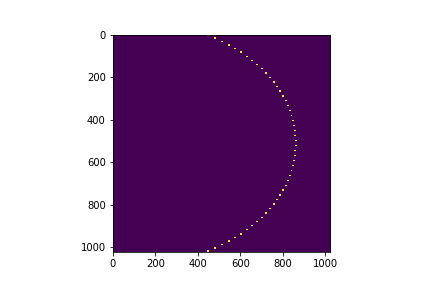

In [521]:
plt.subplots()
plt.imshow(l)
plt.imshow(ll)



This still needs to be integrated into the actual image. I can build up a little grid map (it won't be as pretty, but it will be accurate). Make a matrix of 1's and zero's, then multiply the grid matrix element wise by the main one. The grid lines should zero out and we will be left with a nice gridded image (hopefully). We can change the pixel size by decreasing ep, to make it more subtle.

In [469]:
testt=np.r_[np.meshgrid(np.linspace(-np.pi,np.pi,30),np.linspace(0,10))].T
test = testt.reshape(-1,testt.shape[-1])
tes

(array([   0,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
          43,   44,   45,   46,   47,   48,   49,   50,  100,  150,  200,
         250,  300,  350,  400,  450,  500,  550,  600,  650,  700,  750,
         800,  850,  900,  950, 1000, 1050, 1100, 1150, 1200, 1250, 1300,
        1350, 1400, 1450]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

## Vectorize This to Speed it up

In [ ]:
im = im[0]
idz,idy = np.indices(im.shape)
zCor = z_Coord(idz)
yCor = x_Coord(idy)
thArray = theta(rho,zCor)
phArray = phir(rho,thArray,yCor)

In [ ]:
raw_x = 300
raw_z = 400
x1 = x_Coord(raw_x)
z1 = z_Coord(raw_z)
th = theta(rho,z1)
ph = phi(rho,th,x1)
print(ph)
print(np.arcsin(x1/(rho*np.sin(th))))
x_num = 2*np.sqrt(2)*np.cos(lat(th))*np.sin(phi(rho,th,x1)/2.)
x_denom = np.sqrt(1+np.cos(lat(th)*np.cos(phi(rho,th,x1)/2.)))

y_num = np.sqrt(2)*np.sin(lat(th))
y_denom = np.sqrt(1+np.cos(lat(th))*np.cos(phi(rho,th,x1)/2))
#hammer_proj(rho,300,400)

## Fragements

In [121]:
class TestPoint():
    def __init__(self, image):
        self.sx,self.sy,junk=image.shape
        self.cx,self.cy = self.sx//2,self.sy//2
        self.x = np.random.randint(0,sx)
        self.y = np.random.randint(0,sy)
    def setPoints(self,xNew,yNew):
        self.x = xNew
        self.y = yNew
    def getPoints(self):
        return (self.x,self.y)
    def drawSinglePoint(self, image):
        fig,ax = plt.subplots()
        ax.imshow(image)
        circ = plt.Circle((self.x,self.y),20,color='red',zorder=1)
        ax.add_artist(circ)
        
        


def hammer_proj(rho,raw_y,raw_z):
    x1 = x_Coord(raw_x)
    z1 = z_Coord(raw_z)
    th = theta(rho,z1)
    x_num = 2*np.sqrt(2)*np.cos(lat(th))*np.sin(phi(rho,th,x1)/2.)
    x_denom = np.sqrt(1+np.cos(lat(th)*np.cos(phi(rho,th,x1)/2.)))
    
    y_num = np.sqrt(2)*np.sin(lat(th))
    y_denom = np.sqrt(1+np.cos(lat(th))*np.cos(phi(rho,th,x1)/2))
    
    return np.array([y_num/y_denom, x_num/x_denom])